In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering

# TASK1

In [2]:
df1 = pd.read_csv('DS2_C6_S2_MoveHubQualityOfLife_Data_Practice.csv')
df2 = pd.read_csv('DS2_C6_S2_MoveHubCostOfLiving_Data_Practice.csv')
df3 = pd.read_csv('DS2_C6_S2_WorldCities_Data_Practice.csv')
df4 = pd.read_csv('DS2_C6_S2_Cities_Data_Practice.csv')

# TASK2

In [3]:
df3 = df3.rename(columns={'city':'City'})

In [4]:
df5 = df1.merge(df2, on='City', how = 'inner')

In [5]:
df6 = df5.merge(df4, on='City', how = 'inner')

In [6]:
Final_df = df6.merge(df3, on='City', how = 'inner')

In [7]:
Final_df.head()

,City,Movehub Rating,Purchase Power,Health Care,Pollution,Quality of Life,Crime Rating,Cappuccino,Cinema,Wine,...,city_ascii,lat,lng,country,iso2,iso3,admin_name,capital,population,id
0,Caracas,65.18,11.25,44.44,83.45,8.61,85.70,1.80,9.12,11.97,...,Caracas,10.5000,-66.9333,Venezuela,VE,VEN,Distrito Capital,primary,1943901.0,1862748204
1,Johannesburg,84.08,53.99,59.98,47.39,51.26,83.93,1.16,3.46,3.53,...,Johannesburg,-26.2044,28.0416,South Africa,ZA,ZAF,Gauteng,admin,4434827.0,1710550792
2,Fortaleza,80.17,52.28,45.46,66.32,36.68,78.65,1.46,5.20,5.85,...,Fortaleza,-3.7275,-38.5275,Brazil,BR,BRA,Ceará,admin,2452185.0,1076567885
3,Mexico City,75.07,24.28,61.76,18.95,27.91,77.86,1.60,3.20,7.47,...,Mexico City,19.4333,-99.1333,Mexico,MX,MEX,Ciudad de México,primary,20996000.0,1484247881
4,Detroit,70.63,73.81,63.05,83.45,50.99,76.69,1.96,5.56,7.85,...,Detroit,42.3834,-83.1024,United States,US,USA,Michigan,NaN,3506126.0,1840003971


In [8]:
Final_df.drop_duplicates(subset='City', keep='first', inplace=True, ignore_index=True)

In [9]:
FD = Final_df.copy()
Final_df.head()

,City,Movehub Rating,Purchase Power,Health Care,Pollution,Quality of Life,Crime Rating,Cappuccino,Cinema,Wine,...,city_ascii,lat,lng,country,iso2,iso3,admin_name,capital,population,id
0,Caracas,65.18,11.25,44.44,83.45,8.61,85.70,1.80,9.12,11.97,...,Caracas,10.5000,-66.9333,Venezuela,VE,VEN,Distrito Capital,primary,1943901.0,1862748204
1,Johannesburg,84.08,53.99,59.98,47.39,51.26,83.93,1.16,3.46,3.53,...,Johannesburg,-26.2044,28.0416,South Africa,ZA,ZAF,Gauteng,admin,4434827.0,1710550792
2,Fortaleza,80.17,52.28,45.46,66.32,36.68,78.65,1.46,5.20,5.85,...,Fortaleza,-3.7275,-38.5275,Brazil,BR,BRA,Ceará,admin,2452185.0,1076567885
3,Mexico City,75.07,24.28,61.76,18.95,27.91,77.86,1.60,3.20,7.47,...,Mexico City,19.4333,-99.1333,Mexico,MX,MEX,Ciudad de México,primary,20996000.0,1484247881
4,Detroit,70.63,73.81,63.05,83.45,50.99,76.69,1.96,5.56,7.85,...,Detroit,42.3834,-83.1024,United States,US,USA,Michigan,NaN,3506126.0,1840003971


In [10]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()

In [11]:
Final_df['City'] = label_encoder.fit_transform(Final_df['City'])
Final_df['Country'] = label_encoder.fit_transform(Final_df['Country'])
Final_df['city_ascii'] = label_encoder.fit_transform(Final_df['city_ascii'])
Final_df['country'] = label_encoder.fit_transform(Final_df['country'])
Final_df['iso2'] = label_encoder.fit_transform(Final_df['iso2'])
Final_df['iso3'] = label_encoder.fit_transform(Final_df['iso3'])
Final_df['admin_name'] = label_encoder.fit_transform(Final_df['admin_name'])
Final_df['capital'] = label_encoder.fit_transform(Final_df['capital'])

In [12]:
#from sklearn.preprocessing import StandardScaler
#scaler = StandardScaler()
#Final_df= pd.DataFrame(scaler.fit_transform(Final_df),columns=Final_df.columns)
Final_df.head()

,City,Movehub Rating,Purchase Power,Health Care,Pollution,Quality of Life,Crime Rating,Cappuccino,Cinema,Wine,...,city_ascii,lat,lng,country,iso2,iso3,admin_name,capital,population,id
0,42,65.18,11.25,44.44,83.45,8.61,85.70,1.80,9.12,11.97,...,42,10.5000,-66.9333,76,75,75,43,2,1943901.0,1862748204
1,85,84.08,53.99,59.98,47.39,51.26,83.93,1.16,3.46,3.53,...,85,-26.2044,28.0416,63,77,77,49,0,4434827.0,1710550792
2,66,80.17,52.28,45.46,66.32,36.68,78.65,1.46,5.20,5.85,...,66,-3.7275,-38.5275,10,10,11,36,0,2452185.0,1076567885
3,111,75.07,24.28,61.76,18.95,27.91,77.86,1.60,3.20,7.47,...,111,19.4333,-99.1333,42,48,47,39,2,20996000.0,1484247881
4,57,70.63,73.81,63.05,83.45,50.99,76.69,1.96,5.56,7.85,...,57,42.3834,-83.1024,74,73,74,93,3,3506126.0,1840003971


# TASK3

In [13]:
X=Final_df[['Cappuccino','Wine']]
hc = AgglomerativeClustering(affinity = 'euclidean', linkage = 'average')
y_hc = hc.fit_predict(X)

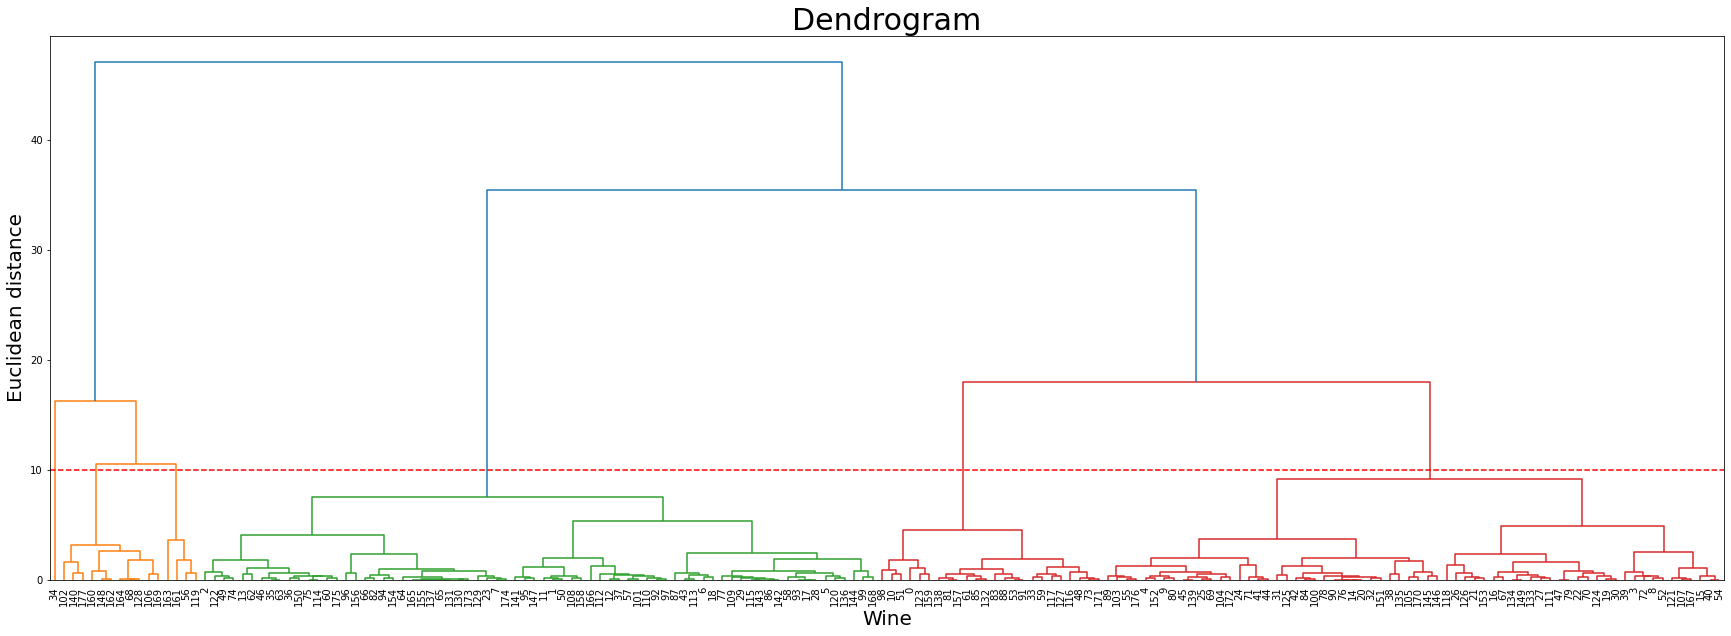

In [14]:
X=Final_df[['Cappuccino','Wine']]
plt.figure(figsize=(30, 10))
dendrogrm = sch.dendrogram(sch.linkage(X, method = 'ward'))
plt.axhline(y=10, color='r', linestyle='--')
ax = plt.gca()
ax.tick_params(axis='x', which='major', labelsize=10)
plt.title('Dendrogram',fontsize=30)
plt.xlabel('Wine',fontsize=20)
plt.ylabel('Euclidean distance', fontsize=20)
plt.show()

# TASK4

In [15]:
hc = AgglomerativeClustering(n_clusters=3,affinity = 'euclidean', linkage = 'average')
f_pred = hc.fit_predict(Final_df)

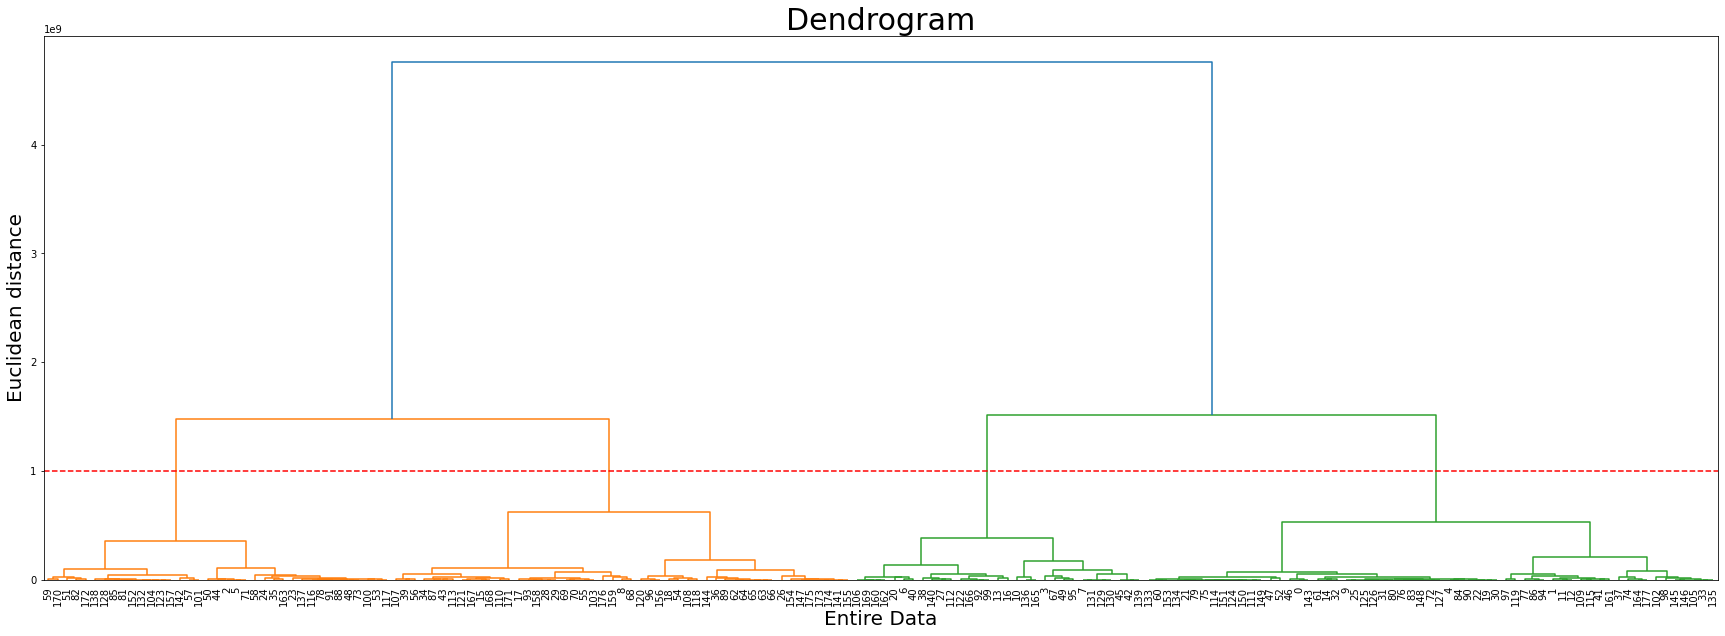

In [16]:
X=Final_df
plt.figure(figsize=(30, 10))
dendrogrm = sch.dendrogram(sch.linkage(X, method = 'ward'))
plt.axhline(y=1e9, color='r', linestyle='--')
ax = plt.gca()
ax.tick_params(axis='x', which='major', labelsize=10)
plt.title('Dendrogram',fontsize=30)
plt.xlabel('Entire Data',fontsize=20)
plt.ylabel('Euclidean distance', fontsize=20)
plt.show()

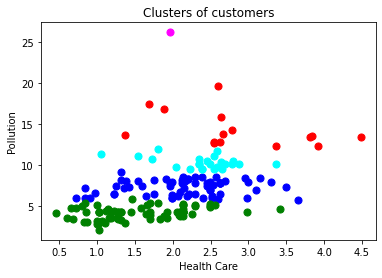

In [17]:
X = Final_df[['Cappuccino','Wine']]
hc = AgglomerativeClustering(n_clusters=5,affinity = 'euclidean', linkage = 'ward')
y_hc = hc.fit_predict(X)
X = np.array(X)
plt.scatter(X[y_hc == 0, 0], X[y_hc == 0, 1], s = 50, c = 'red')
plt.scatter(X[y_hc == 1, 0], X[y_hc == 1, 1], s = 50, c = 'blue')
plt.scatter(X[y_hc == 2, 0], X[y_hc == 2, 1], s = 50, c = 'green')
plt.scatter(X[y_hc == 3, 0], X[y_hc == 3, 1], s = 50, c = 'cyan')
plt.scatter(X[y_hc == 4, 0], X[y_hc == 4, 1], s = 50, c = 'magenta')
plt.title('Clusters of customers')
plt.xlabel('Health Care')
plt.ylabel('Pollution')
plt.show()

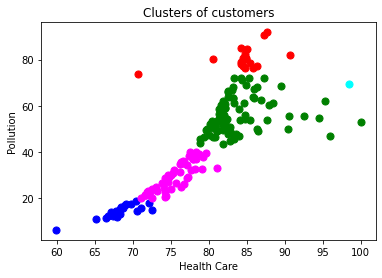

In [18]:
X = Final_df[['Movehub Rating','Purchase Power']]
hc = AgglomerativeClustering(n_clusters=5,affinity = 'euclidean', linkage = 'average')
y_hc = hc.fit_predict(X)
X = np.array(X)
plt.scatter(X[y_hc == 0, 0], X[y_hc == 0, 1], s = 50, c = 'red')
plt.scatter(X[y_hc == 1, 0], X[y_hc == 1, 1], s = 50, c = 'blue')
plt.scatter(X[y_hc == 2, 0], X[y_hc == 2, 1], s = 50, c = 'green')
plt.scatter(X[y_hc == 3, 0], X[y_hc == 3, 1], s = 50, c = 'cyan')
plt.scatter(X[y_hc == 4, 0], X[y_hc == 4, 1], s = 50, c = 'magenta')
plt.title('Clusters of customers')
plt.xlabel('Health Care')
plt.ylabel('Pollution')
plt.show()

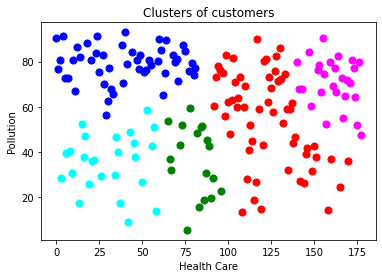

In [19]:
X = Final_df[['City','Quality of Life']]
hc = AgglomerativeClustering(n_clusters=5,affinity = 'euclidean', linkage = 'average')
y_hc = hc.fit_predict(X)
X = np.array(X)
plt.scatter(X[y_hc == 0, 0], X[y_hc == 0, 1], s = 50, c = 'red')
plt.scatter(X[y_hc == 1, 0], X[y_hc == 1, 1], s = 50, c = 'blue')
plt.scatter(X[y_hc == 2, 0], X[y_hc == 2, 1], s = 50, c = 'green')
plt.scatter(X[y_hc == 3, 0], X[y_hc == 3, 1], s = 50, c = 'cyan')
plt.scatter(X[y_hc == 4, 0], X[y_hc == 4, 1], s = 50, c = 'magenta')
plt.title('Clusters of customers')
plt.xlabel('Health Care')
plt.ylabel('Pollution')
plt.show()

# Which all are city is most likely Berlin 

In [20]:
hc = AgglomerativeClustering(n_clusters=5,affinity = 'euclidean', linkage = 'average')
f_pred = hc.fit_predict(Final_df)
FD['Cluster']=f_pred

In [21]:
x = FD.groupby('Cluster')

In [22]:
for i in range(4):
     if 'Berlin' in x.get_group(i).City.unique():
            print(x.get_group(i).City.unique())

['Santo Domingo' 'Athens' 'Paris' 'Quito' 'Lyon' 'Nice' 'Toulouse'
 'Strasbourg' 'Marseille' 'Helsinki' 'Nicosia' 'Prague' 'Copenhagen'
 'Zagreb' 'Cologne' 'Addis Ababa' 'Hamburg' 'Berlin' 'Stuttgart'
 'Limassol' 'Aachen' 'Dresden' 'Munich']


# Interactive

In [24]:
%matplotlib inline
from ipywidgets import interactive
import matplotlib.pyplot as plt
import numpy as np

def f(F1,F2,Affinity ):
    a = Final_df.iloc[:,F1]
    b = Final_df.iloc[:,F2]
    X = pd.concat([a,b],axis=1)
    hc = AgglomerativeClustering(n_clusters=5,affinity = Affinity, linkage = 'complete')
    y_hc = hc.fit_predict(X)
    X = np.array(X)
    plt.figure(figsize=(15,7))

    plt.scatter(X[y_hc == 0, 0], X[y_hc == 0, 1], s = 50, c = 'red')
    plt.scatter(X[y_hc == 1, 0], X[y_hc == 1, 1], s = 50, c = 'blue')
    plt.scatter(X[y_hc == 2, 0], X[y_hc == 2, 1], s = 50, c = 'green')
    plt.scatter(X[y_hc == 3, 0], X[y_hc == 3, 1], s = 50, c = 'cyan')
    plt.scatter(X[y_hc == 4, 0], X[y_hc == 4, 1], s = 50, c = 'magenta')
    plt.title('Clusters of customers')
    plt.xlabel(a.name)
    plt.ylabel(b.name)
    plt.show()
    
interactive_plot = interactive(f, F1=(0, 14,1), F2=(0, 14, 1), Affinity = ["euclidean", "l1", "l2", "manhattan", "cosine"])
output = interactive_plot.children[-1]
output.layout.height = '550px'
interactive_plot

interactive(children=(IntSlider(value=7, description='F1', max=14), IntSlider(value=7, description='F2', max=1…